In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\ART\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ART\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ART\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ART\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

In [2]:
data=pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-21,198.800003,200.850006,198.149994,198.779999,196.435623,47800600
1,2019-06-24,198.539993,200.160004,198.169998,198.580002,196.237991,18220400
2,2019-06-25,198.429993,199.259995,195.289993,195.570007,193.263504,21070300
3,2019-06-26,197.770004,200.990005,197.350006,199.800003,197.443619,26067500
4,2019-06-27,200.289993,201.570007,199.570007,199.740005,197.384323,20899700


In [3]:
data["Open"].dtype

dtype('float64')

In [4]:
data.shape

(252, 7)

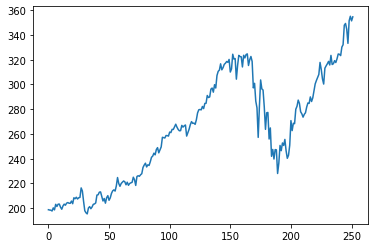

In [5]:
plt.plot(data["Open"])

In [12]:
stock_data=data.reset_index()["Open"]
train_size=(int(len(stock_data)*0.7))
test_size=(len(stock_data)-train_data)

In [10]:
open_feature=np.array(data["Open"]).reshape(-1,1)

In [11]:
train_data=open_feature[:train_size]
test_data=open_feature[train_size:]

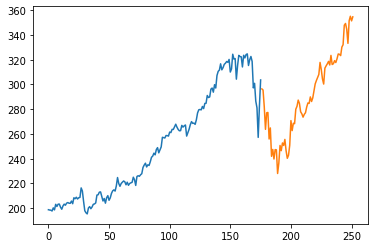

In [13]:
train_plot=np.empty_like(open_feature)
train_plot[:,:]=np.nan
train_plot[:train_size,:]=train_data
test_plot=np.empty_like(open_feature)
test_plot[:,:]=np.nan
test_plot[train_size:,:]=test_data
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

In [14]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.fit_transform(test_data)

In [15]:
def train_test_splict(data,time_stamp):
    x_data,y_data=[],[]
    for i in range(len(data)-time_stamp-1):
        x_data.append(train_data[i:i+time_stamp,0])
        y_data.append(train_data[i+time_stamp])
    return np.array(x_data),np.array(y_data)

x_test,y_test=train_test_splict(test_data,time_stamp=30)
x_train,y_train=train_test_splict(train_data,time_stamp=30)

In [16]:
model=Sequential()
model.add(LSTM(112,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(109,return_sequences=True))
model.add(LSTM(109))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [18]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          epochs=100,verbose=1,batch_size=40)

Instructions for updating:
Use tf.cast instead.
Train on 145 samples, validate on 45 samples
Epoch 1/100
145/145 [==============================] - 2s 14ms/step - loss: 0.1560 - val_loss: 0.0408
Epoch 2/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0566 - val_loss: 0.0029
Epoch 3/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0462 - val_loss: 0.0039
Epoch 4/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0171 - val_loss: 0.0206
Epoch 5/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0193 - val_loss: 0.0158
Epoch 6/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0056
Epoch 7/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0127 - val_loss: 0.0047
Epoch 8/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0085 - val_loss: 0.0063
Epoch 9/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.00

145/145 [==============================] - 1s 4ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 79/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 80/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 81/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 82/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 83/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 84/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 85/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 86/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 87/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0042 - val_loss: 

In [21]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

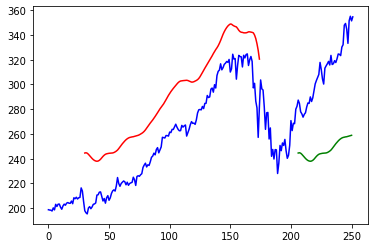

In [22]:
time_stamp=30
train_plot=np.empty_like(open_feature)
train_plot[:,:]=np.nan
train_plot[time_stamp:len(train_predict)+time_stamp,:]=train_predict
test_plot=np.empty_like(open_feature)
test_plot[:,:]=np.nan
test_plot[len(train_predict)+(time_stamp*2)+1:len(open_feature)-1,:]=test_predict
plt.plot(open_feature,c="b")
plt.plot(scaler.inverse_transform(train_plot),c="r")
plt.plot(scaler.inverse_transform(test_plot),c="g")
plt.show()

In [42]:
temp_open_feature=scaler.fit_transform(open_feature)
temp_data=temp_open_feature[222:,:].reshape(1,-1)
temp_data.shape

(1, 30)

In [43]:
temp_input=list(temp_data)
print(temp_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[array([0.69005896, 0.70545893, 0.76637029, 0.73081255, 0.68298493,
       0.65694259, 0.73719805, 0.74884188, 0.75917113, 0.77156634,
       0.75347435, 0.80186556, 0.75579078, 0.75973452, 0.77525982,
       0.76586956, 0.78465008, 0.80912738, 0.8074372 , 0.80092657,
       0.84412173, 0.85595355, 0.95461374, 0.96344061, 0.93470644,
       0.86290225, 0.97689994, 1.        , 0.97658701, 0.99680744])]
[0.690058957684923, 0.7054589273481238, 0.7663702933748777, 0.7308125535753445, 0.6829849306989442, 0.6569425852599591, 0.7371980491547545, 0.7488418836134898, 0.7591711317873504, 0.7715663435311346, 0.7534743491595313, 0.8018655566461474, 0.7557907759979201, 0.7597345223321976, 0.7752598206623151, 0.7658695609033155, 0.7846500804213148, 0.809127382567133, 0.8074372046724181, 0.8009265682312863, 0.8441217255616456, 0.8559535467605828, 0.9546137444981684, 0.963440613712321, 0.9347064376303014, 0.8629022450796449, 0.9768999422123417, 1.0000000000000002, 0.9765870149359597, 0.996807443145576

In [44]:
i=0
output=[]
while i<30:
    if len(temp_input)>time_stamp:
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,time_stamp,1)
        y_predict=model.predict(x_input)
        temp_input.extend(y_predict[0].tolist())
        temp_input=temp_input[1:]
        output.extend(y_predict[0].tolist())
        i+=1
    else:
        print("exe")
        temp_data=temp_data.reshape(1,time_stamp,1)
        y_predict=model.predict(temp_data)
        temp_input.extend(y_predict[0].tolist())
        output.extend(y_predict[0].tolist())
        i+=1 

exe


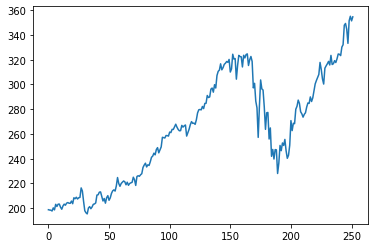

In [109]:
plt.plot(open_feature)


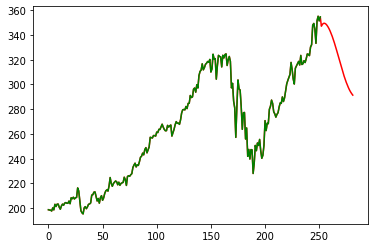

In [125]:
output_plot=open_feature.tolist()
output_plot.extend(scaler.inverse_transform(output))
plt.plot(output_plot,c="r")
plt.plot(open_feature,c="g")

(252, 1)